In [1]:
# 基本信息
import numpy as np
import pandas as pd
from pandas import Series, DataFrame

# 股票市场信息获取
import pandas_datareader as pdr

# 可视化
import matplotlib.pyplot as plt
import seaborn as sns

# 日期时间
from datetime import datetime

In [2]:
# 准备工作 - 数据获取
# 1. 定义开始时间
startDate = datetime(2015,9,20)
# 2. 通过pandas_datareader获取股票信息
alibaba = pdr.get_data_yahoo('BABA', start=startDate)
amazon = pdr.get_data_yahoo('AMZN', start=startDate)

In [4]:
# 数据离线保存
alibaba.to_csv('BABA.csv')
amazon.to_csv('AMZN.csv')

### 历史趋势分析

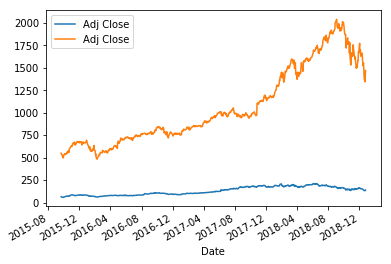

In [10]:
# 调整后的收盘价走势
alibaba['Adj Close'].plot(legend=True)
amazon['Adj Close'].plot(legend=True)

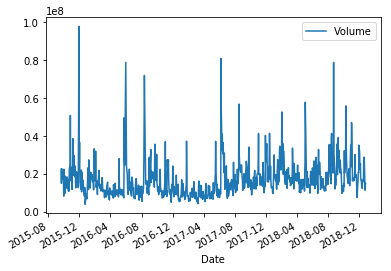

In [8]:
# 阿里交易量走势
alibaba['Volume'].plot(legend=True)

In [12]:
# 阿里每日股价差值的变化趋势
# 1. 添加日差价新列
alibaba['High-Low'] = alibaba['High'] - alibaba['Low']

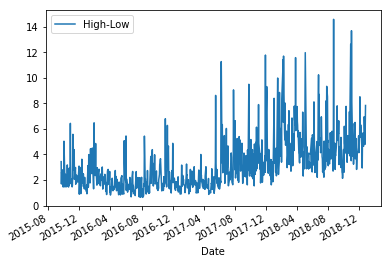

In [15]:
# 2. 绘制日差价变化趋势图
alibaba['High-Low'].plot(legend=True)

In [17]:
# pct_change() 计算增长率
alibaba['daily-return'] = alibaba['Adj Close'].pct_change()

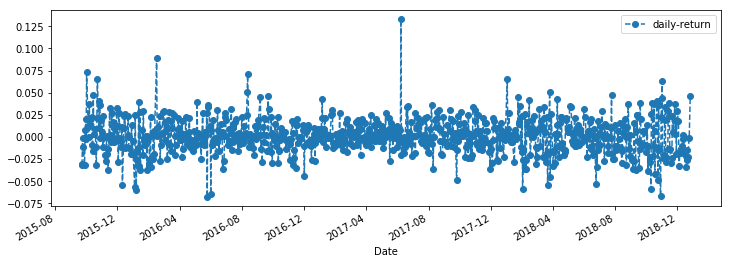

In [23]:
alibaba['daily-return'].plot(legend=True, figsize=(12,4), linestyle='--', marker='o')

C:\Users\jiangyanfei\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


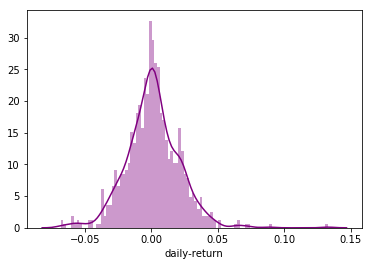

In [26]:
# 绘制调整后收盘价的变化趋势直方图
sns.distplot(alibaba['daily-return'].dropna(), bins=100, color='purple')

### 风险评估

In [27]:
# 获取五家科技公司从15年1月1日到现在的每日调整后收盘价
start = datetime(2015,1,1)
company = ['AAPL', 'GOOG', 'MSFT', 'AMZN', 'FB']
top_tech_df = pdr.get_data_yahoo(company, start=start)['Adj Close']

In [28]:
# 离线存储数据
top_tech_df.to_csv('top5.csv')

In [30]:
# 数据部分展示
top_tech_df.tail()

Symbols,AAPL,AMZN,FB,GOOG,MSFT
Date,,,,,
2018-12-19,160.889999,1495.079956,133.240005,1023.010010,103.690002
2018-12-20,156.830002,1460.829956,133.399994,1009.409973,101.510002
2018-12-21,150.729996,1377.449951,124.949997,979.539978,98.230003
2018-12-24,146.830002,1343.959961,124.059998,976.219971,94.129997
2018-12-26,157.169998,1470.900024,134.179993,1039.459961,100.559998


In [31]:
# 每日调整后收盘价增长率获取(记得去除NaN数据)
top_tech_dr = top_tech_df.pct_change()

In [32]:
top_tech_dr.head()

Symbols,AAPL,AMZN,FB,GOOG,MSFT
Date,,,,,
2014-12-31,NaN,NaN,NaN,NaN,NaN
2015-01-02,-0.009513,-0.005897,0.005511,-0.003025,0.006674
2015-01-05,-0.028172,-0.020517,-0.016061,-0.020846,-0.009196
2015-01-06,0.000094,-0.022833,-0.013473,-0.023177,-0.014677
2015-01-07,0.014022,0.010600,0.000000,-0.001713,0.012706


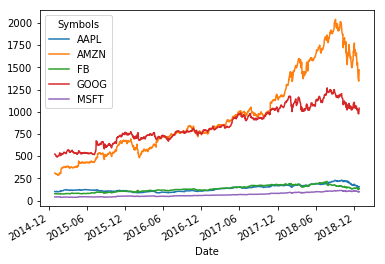

In [33]:
# 调整后收盘价走势
top_tech_df.plot()

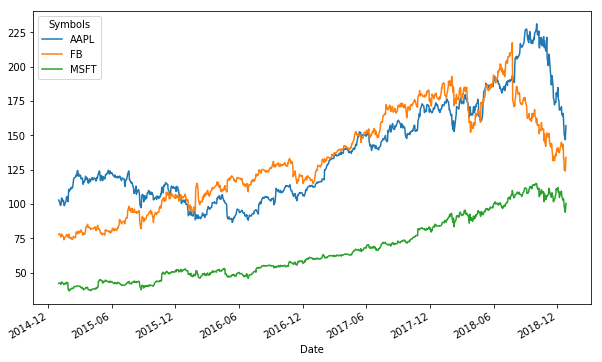

In [37]:
# 第二梯队收盘价走势
top_tech_df[['AAPL', 'FB', 'MSFT']].plot(figsize=(10,6))

C:\Users\jiangyanfei\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\jiangyanfei\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


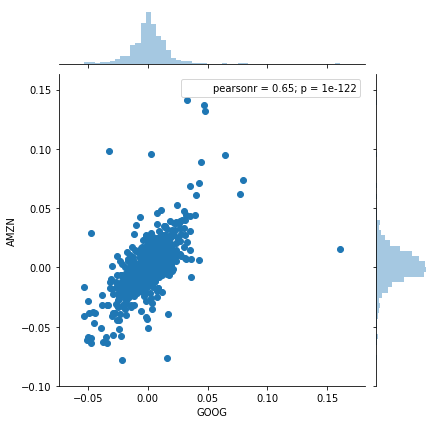

In [43]:
# 散点图增长率分布趋势 第一梯队：谷歌 亚马逊
sns.jointplot('GOOG','AMZN', top_tech_dr, kind='scatter')
# 可以看出，散点图的分布趋势线型相关系数为0.65，可以推测出，谷歌、亚马逊股票具有正相关性（0 < pearson < 1）

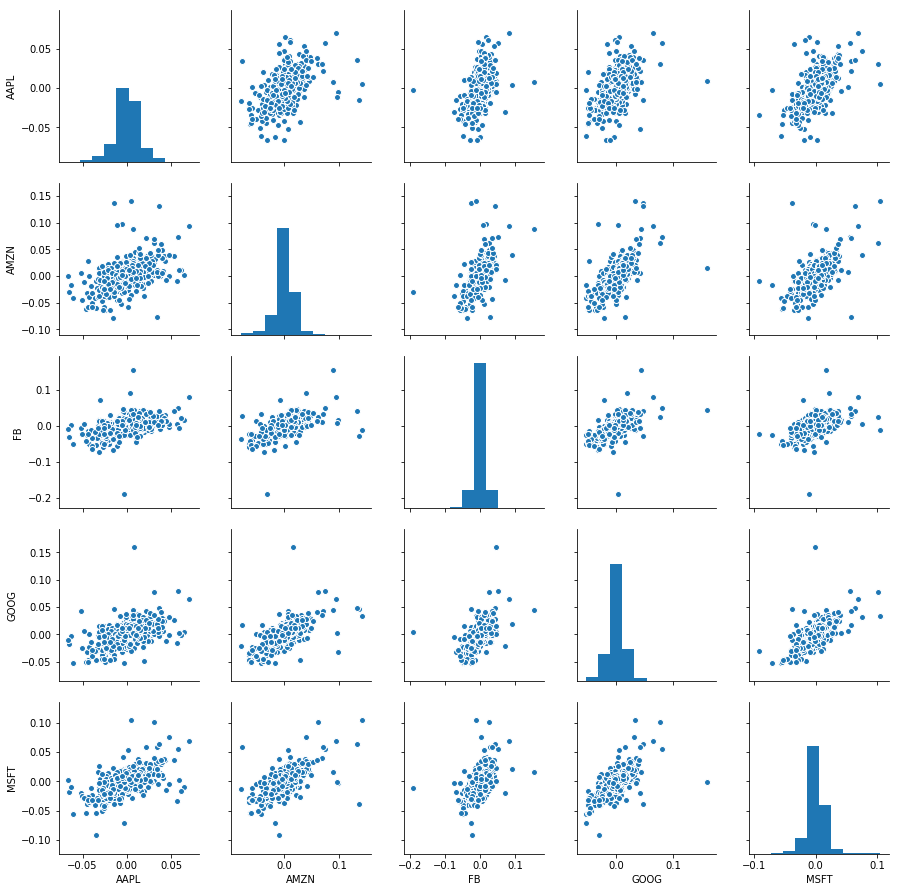

In [44]:
# 采用多变量图的形式进行 所有增长率数据的三点分布情况展示(处理NaN数据)
sns.pairplot(top_tech_dr.dropna())

In [48]:
# 分位数 参数为概率性百分比
# 有95%[1 - 0.05]的信心，让增长率保留在-0.008(亏损0.8%)
top_tech_dr['AAPL'].quantile(0.05)

-0.008790923164640297